# **Key columns:**

1. Customer ID: A unique identifier for each customer.

2. Age: The age of the customer. Older customers might behave differently from younger customers in terms of loyalty or churn.

3. Tenure (Months):
The length of time the customer has been with the company (in months). Longer tenures often indicate loyalty and a lower likelihood of churn.

4. Monthly Charges:
The monthly bill amount for the customer. Higher charges may influence churn if customers feel they are not getting value for money.

5. Contract Type:
The type of contract the customer has (e.g., Monthly or Yearly). Customers with monthly contracts may be more likely to churn since they have shorter commitments.

6. Customer Service Calls: The number of times a customer has called customer service. More frequent calls could indicate dissatisfaction, leading to a higher risk of churn.

7. Churn (Target Variable):
Whether the customer has churned (1 = Yes, 0 = No). This is the target column we are trying to predict.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQMvFZeL17L_wIiGHNOuN-mi7Pz7Sujv4i_HVz7rzRX968nIBbEHNDl32c7iB3SJdxlWR4KKaA-fqmq/pub?gid=0&single=true&output=csv'
data = pd.read_csv(url)

# Display the first few rows
data.head()

,Customer ID,Age,Tenure (Months),Monthly Charges,Contract Type,Customer Service Calls,Churn
0,C0001,56,35,98.68,Monthly,0,1
1,C0002,69,51,74.23,Monthly,5,0
2,C0003,46,15,48.19,Yearly,5,1
3,C0004,32,25,74.38,Monthly,4,0
4,C0005,60,55,67.80,Yearly,4,0


In [ ]:
# Display the summary statistics before handling missing values
print("\nInitial Dataset Summary:\n", data.describe())


Initial Dataset Summary:
               Age  Tenure (Months)  Monthly Charges  Customer Service Calls  \
count  1000.00000      1000.000000      1000.000000             1000.000000   
mean     43.81900        30.621000        65.152050                2.572000   
std      14.99103        17.005074        20.252949                1.723307   
min      18.00000         1.000000        30.230000                0.000000   
25%      31.00000        16.000000        47.015000                1.000000   
50%      44.00000        31.000000        65.870000                3.000000   
75%      56.00000        45.000000        82.382500                4.000000   
max      69.00000        59.000000        99.960000                5.000000   

             Churn  
count  1000.000000  
mean      0.246000  
std       0.430894  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Customer ID               0
Age                       0
Tenure (Months)           0
Monthly Charges           0
Contract Type             0
Customer Service Calls    0
Churn                     0
dtype: int64


# Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset from Google Sheets
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQMvFZeL17L_wIiGHNOuN-mi7Pz7Sujv4i_HVz7rzRX968nIBbEHNDl32c7iB3SJdxlWR4KKaA-fqmq/pub?gid=0&single=true&output=csv'
data = pd.read_csv(url)

# Display the first few rows to check the dataset
data.head()

,Customer ID,Age,Tenure (Months),Monthly Charges,Contract Type,Customer Service Calls,Churn
0,C0001,56,35,98.68,Monthly,0,1
1,C0002,69,51,74.23,Monthly,5,0
2,C0003,46,15,48.19,Yearly,5,1
3,C0004,32,25,74.38,Monthly,4,0
4,C0005,60,55,67.80,Yearly,4,0


In [ ]:
# Encoding the 'Contract Type' column (Monthly/Yearly) into numerical values
label_encoder = LabelEncoder()
data['Contract Type'] = label_encoder.fit_transform(data['Contract Type'])

In [ ]:
# Separate features and target variable
X = data.drop(['Customer ID', 'Churn'], axis=1)  # Exclude 'Customer ID' and target 'Churn'
y = data['Churn']  # Target variable

In [ ]:
# Import the necessary class from sklearn
from sklearn.preprocessing import StandardScaler

# Feature Scaling: Standardizing numerical features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets

In [ ]:
# Import the necessary class from sklearn
from sklearn.model_selection import train_test_split

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build Logistic Regression Model

In [ ]:
# Import the necessary class from sklearn
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Make Predictions on the Test Set

In [ ]:
y_pred = logreg.predict(X_test)

# Evaluate the Model's Performance

In [ ]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 72.00%
Confusion Matrix:
[[216   0]
 [ 84   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       216
           1       0.00      0.00      0.00        84

    accuracy                           0.72       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.52      0.72      0.60       300



# Visualization

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQMvFZeL17L_wIiGHNOuN-mi7Pz7Sujv4i_HVz7rzRX968nIBbEHNDl32c7iB3SJdxlWR4KKaA-fqmq/pub?gid=0&single=true&output=csv'
data = pd.read_csv(url)

1. Distribution of Churn

<ipython-input-38-4c70ac8b67c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


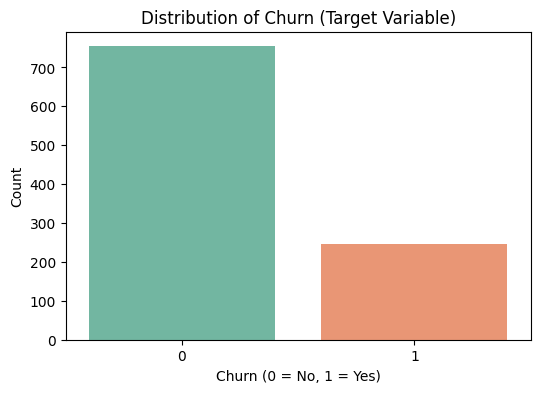

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

2. Visualizing the correlation matrix

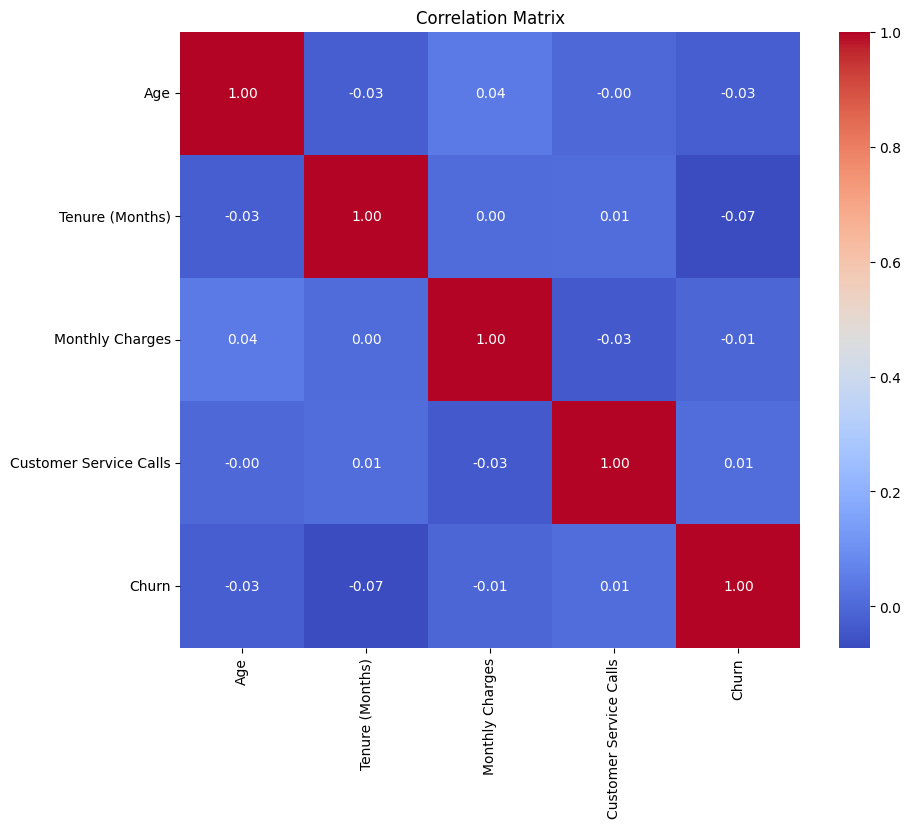

In [ ]:
plt.figure(figsize=(10,8))
# Exclude non-numeric columns like 'Customer ID' before calculating correlation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

3. Boxplot of Monthly Charges vs Churn

<ipython-input-41-bd5036cfdda3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Monthly Charges', data=data, palette='Set3')


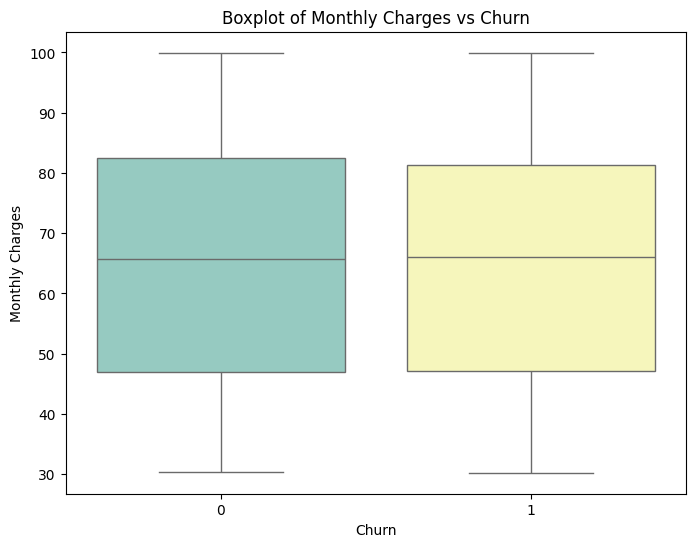

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Monthly Charges', data=data, palette='Set3')
plt.title('Boxplot of Monthly Charges vs Churn')
plt.show()

4. Feature Importance (Logistic Regression Coefficients)

<Figure size 1000x600 with 0 Axes>

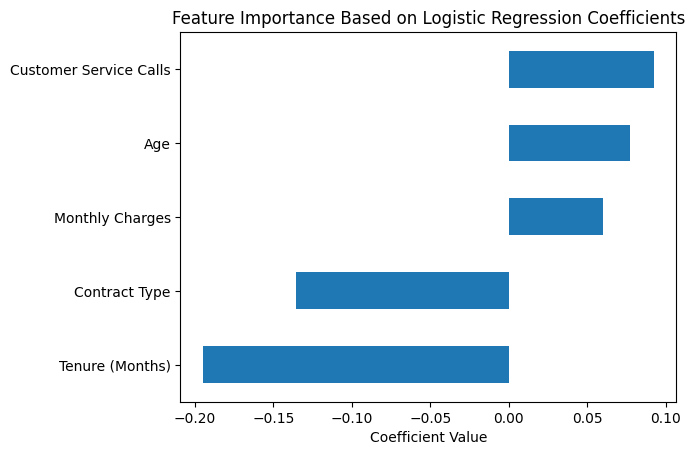

In [ ]:
# Plotting the coefficients of logistic regression model
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=['Coefficient'])

plt.figure(figsize=(10,6))
coefficients.sort_values(by='Coefficient').plot(kind='barh', legend=False)
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.show()

5. Confusion Matrix Visualization

<Figure size 600x600 with 0 Axes>

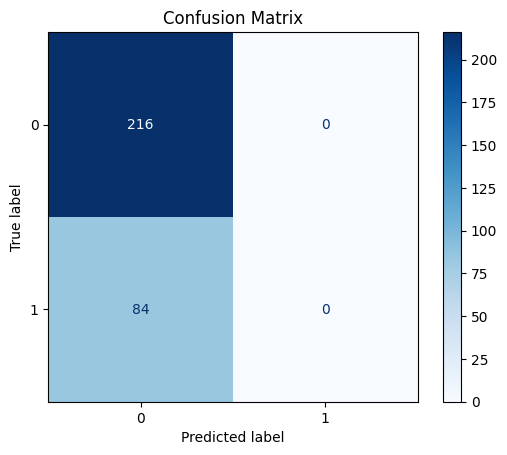

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

6. ROC Curve Visualization

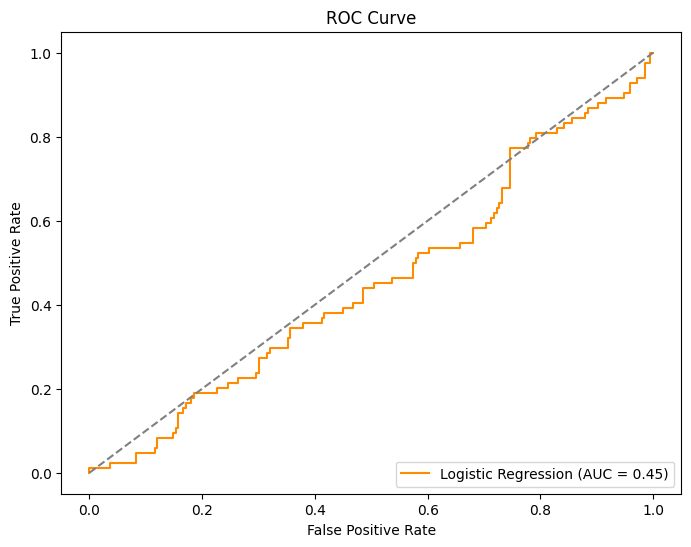

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Intepretation



1. **Churn Distribution (Target Variable)**:
   - The count plot shows that the majority of customers did not churn (0), while the number of customers who churned (1) is much smaller. This indicates an imbalance in the target variable, which can affect model performance.

2. **Correlation Matrix**:
   - The correlation matrix reveals weak correlations between independent variables and churn. The strongest relationship (though still weak) is between `Tenure (Months)` and churn (-0.07), suggesting that longer subscription durations may slightly reduce the likelihood of churn.

3. **Boxplot of Monthly Charges vs. Churn**:
   - The boxplot indicates that customers with higher monthly charges are slightly more likely to churn, but the difference in monthly charges between those who churn and those who don't is not significant.

4. **Feature Importance (Logistic Regression Coefficients)**:
   - The bar chart of logistic regression coefficients highlights that `Customer Service Calls` and `Contract Type` are the most important features for predicting churn. A higher number of customer service calls and certain contract types increase the likelihood of churn.

5. **Confusion Matrix**:
   - The confusion matrix shows that the logistic regression model can accurately predict customers who did not churn but struggles to identify those who did (84 false negatives). This indicates that the model has low sensitivity.

6. **ROC Curve**:
   - The ROC curve shows an Area Under the Curve (AUC) score of 0.45, which is close to random prediction. This low AUC score indicates that the logistic regression model performs poorly in predicting churn.
